In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
# Load the full grocery customer dataset
data = pd.read_csv('customer_personality.csv')

In [3]:
data.head()

,Year_Birth,Education,Marital_Status,Income,Children,Teens,DaysSinceLastPurchase,Alcohol,Fruits,Meats,Vegetables,Grains,Discounts,WebPurchases,StorePurchases
0,1986,College,Single,0,1,0,19,5,1,6,3,263,0,27,0
1,1978,College,Single,0,0,0,53,32,2,536,12,4,0,0,1
2,1973,College,Single,4000,1,0,56,2,1,0,0,0,0,0,0
3,1969,College,Married,4000,0,1,0,16,4,7,2,4,0,25,0
4,1965,College,Divorced,5000,0,0,20,2,1,0,1,0,0,0,0


Text(0, 0.5, 'Meats')

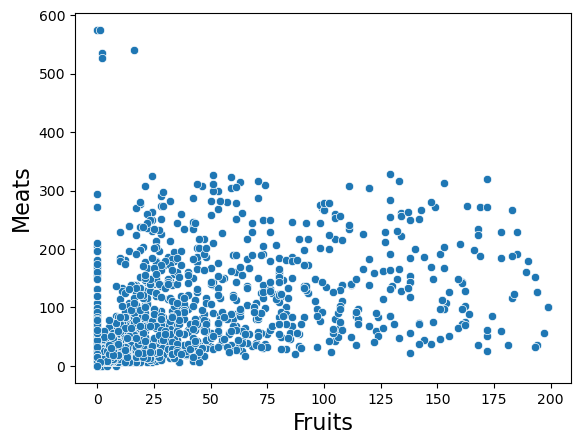

In [4]:
# Plot customer spending on fruits and meats
p = sns.scatterplot(data=data, x='Fruits', y='Meats')
p.set_xlabel('Fruits', fontsize=16)
p.set_ylabel('Meats', fontsize=16)

In [4]:
# Use StandardScaler() to standardize input features
X = data[['Fruits', 'Meats']]
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X)

In [5]:
# Apply the k-means clustering algorithm with k=4
kmeans = KMeans(n_clusters=7, random_state=123, n_init=10)
kmeans = kmeans.fit(X)

In [6]:
# Print the cluster centroids and inertia
print('Centroids:', kmeans.cluster_centers_)
print('Inertia:', kmeans.inertia_)

Centroids: [[ 0.03099712 -0.05404845]
 [ 0.07845286  1.25658105]
 [ 3.25315111  0.59415773]
 [-0.55683728 -0.58767078]
 [ 2.54146154  2.4651687 ]
 [ 0.29191888  3.05572397]
 [ 1.44876594  0.49988373]]
Inertia: 484.15441845177344


In [7]:
# Add the cluster labels to the dataset as strings
data['clusters'] = kmeans.labels_.astype(str)

# Sort by cluster label (for plotting purposes)
data.sort_values(by='clusters', inplace=True)

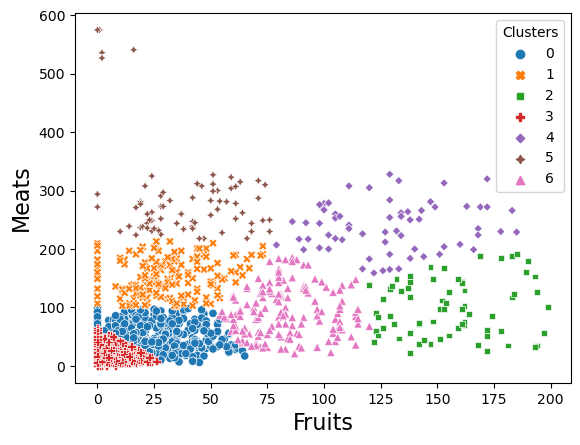

In [8]:
# Plot clusters on the original data
p = sns.scatterplot(data=data, x='Fruits',
                    y='Meats', hue='clusters', 
                    style='clusters')
p.set_xlabel('Fruits', fontsize=16)
p.set_ylabel('Meats', fontsize=16)
p.legend(title='Clusters')

In [10]:
#Identify best k
inertias = []
avg_silhouette = []

# Fit a cluster model with k=2, ..., 9
for k in range(2,15):
    cluster = KMeans(n_clusters=k, random_state=123, n_init=10)
    cluster.fit(X)
    inertias.append(cluster.inertia_)
    avg_silhouette.append(silhouette_score(X, cluster.labels_))

Text(0, 0.5, 'Total inertia')

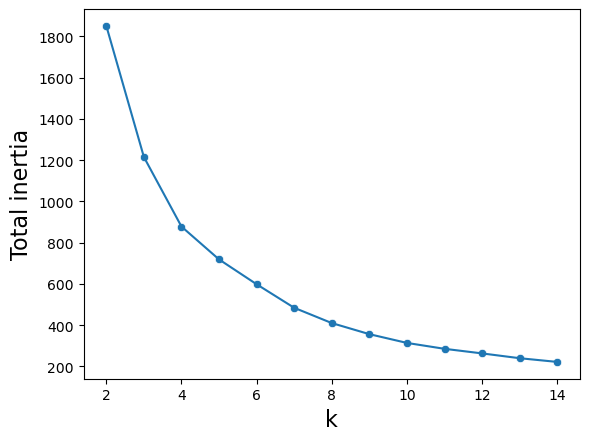

In [11]:
# Make elbow plot
p = sns.lineplot(x=range(2,15), y=inertias, markers = True)
sns.scatterplot(x=range(2,15), y=inertias)
p.set_xlabel('k', fontsize=16)
p.set_ylabel('Total inertia', fontsize=16)